In [ ]:
# 디렉토리 만들기
#!mkdir -p ~/aiffel/rock_scissor_paper    
#!ln -s ~/data/* ~/aiffel/rock_scissor_paper
#!cd ~/aiffel/rock_scissor_paper && unzip data.zip

In [70]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
#import os


In [78]:
from PIL import Image
import glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [79]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./data/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [80]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./data/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")


100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [81]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./data/paper"
resize_images(image_dir_path)

print("보자기 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보자기 이미지 resize 완료!


In [82]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "./data/"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


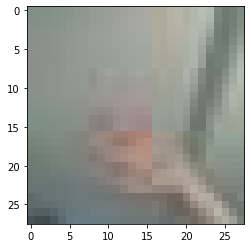

In [83]:
plt.imshow(x_train[200])
print('라벨: ', y_train[0])

In [94]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]
n_channel_1=16
n_channel_2=32
n_channel_3=64
n_dense=64
n_dense2=256
n_train_epoch=100

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
#model.add(keras.layers.Dropout(0.5))
#model.add(keras.layers.Dense(n_dense2, activation='relu'))
#model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 64)              

In [95]:
#Model: "sequential_3"
#_________________________________________________________________
#Layer (type)                 Output Shape              Param #   
#=================================================================
#conv2d_7 (Conv2D)            (None, 26, 26, 256)       7168      
#_________________________________________________________________
#max_pooling2d_7 (MaxPooling2 (None, 13, 13, 256)       0         
#_________________________________________________________________
#conv2d_8 (Conv2D)            (None, 11, 11, 512)       1180160   
#_________________________________________________________________
#max_pooling2d_8 (MaxPooling2 (None, 5, 5, 512)         0         
#_________________________________________________________________
#conv2d_9 (Conv2D)            (None, 3, 3, 512)         2359808   
#_________________________________________________________________
#max_pooling2d_9 (MaxPooling2 (None, 1, 1, 512)         0         
#_________________________________________________________________
#flatten_3 (Flatten)          (None, 512)               0         
#_________________________________________________________________
#dense_6 (Dense)              (None, 512)               262656    
#_________________________________________________________________
#dense_7 (Dense)              (None, 3)                 1539      
#=================================================================
#Total params: 3,811,331
#Trainable params: 3,811,331
#Non-trainable params: 0

In [96]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/100
10/10 [==============================] - 1s 13ms/step - loss: 1.1120 - accuracy: 0.3167
Epoch 2/100
10/10 [==============================] - 0s 12ms/step - loss: 1.0954 - accuracy: 0.3233
Epoch 3/100
10/10 [==============================] - 0s 11ms/step - loss: 1.0931 - accuracy: 0.4267
Epoch 4/100
10/10 [==============================] - 0s 12ms/step - loss: 1.0876 - accuracy: 0.3933
Epoch 5/100
10/10 [==============================] - 0s 13ms/step - loss: 1.0819 - accuracy: 0.4067
Epoch 6/100
10/10 [==============================] - 0s 12ms/step - loss: 1.0838 - accuracy: 0.3600
Epoch 7/100
10/10 [==============================] - 0s 12ms/step - loss: 1.0554 - accuracy: 0.5000
Epoch 8/100
10/10 [==============================] - 0s 11ms/step - loss: 1.0679 - accuracy: 0.4000
Epoch 9/100
10/10 [==============================] - 0s 11ms/step - loss: 1.0256 - accuracy: 0.5567
Epoch 10/100
10/10 [==============================] - 0s 12ms/step - loss: 1.0354 - accuracy: 0.4500

10/10 [==============================] - 0s 15ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 83/100
10/10 [==============================] - 0s 14ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 84/100
10/10 [==============================] - 0s 14ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 85/100
10/10 [==============================] - 0s 13ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 86/100
10/10 [==============================] - 0s 14ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 87/100
10/10 [==============================] - 0s 13ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 88/100
10/10 [==============================] - 0s 16ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 89/100
10/10 [==============================] - 0s 15ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 90/100
10/10 [==============================] - 0s 14ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 91/100
10/10 [==============================] - 0s 14ms/step - loss: 0.0018 - accuracy: 1.0000
Epo

In [91]:
# test data resize

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./data/test/scissor"
resize_images(image_dir_path)

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./data/test/rock"
resize_images(image_dir_path)

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./data/test/paper"
resize_images(image_dir_path)



print("test 이미지 resize 완료!")

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
test 이미지 resize 완료!


In [92]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# [[YOUR CODE]]
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "./data/test/"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [97]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
# [[YOUR CODE]]

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

# 결과

#10/10 - 1s - loss: 4152.1699 - accuracy: 0.4800
#test_loss: 4152.169921875 
#test_accuracy: 0.47999998927116394

10/10 - 0s - loss: 491.9779 - accuracy: 0.6133
test_loss: 491.9778747558594 
test_accuracy: 0.6133333444595337


In [ ]:
#10/10 - 0s - loss: 491.9779 - accuracy: 0.6133
#test_loss: 491.9778747558594 
#test_accuracy: 0.6133333444595337